In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
X=[]
Z=[]
IMG_SIZE=224
Nam='/content/drive/MyDrive/Datasets/Data/5'
Sau='/content/drive/MyDrive/Datasets/Data/6'
Bay='/content/drive/MyDrive/Datasets/Data/7'
Tam='/content/drive/MyDrive/Datasets/Data/8'
Chin='/content/drive/MyDrive/Datasets/Data/9'

In [ ]:
def nhan(img,kieuso):
    return kieuso 

In [ ]:
def make_train_data(kieuso,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = nhan(img,kieuso )
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))     

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
make_train_data('5',Nam)
print(len(X))

100%|██████████| 731/731 [01:19<00:00,  9.21it/s]

731


In [ ]:
make_train_data('6',Sau)
print(len(X))

100%|██████████| 1050/1050 [02:03<00:00,  8.54it/s]

1781


In [ ]:
make_train_data('7',Bay)
print(len(X))

100%|██████████| 819/819 [01:08<00:00, 12.01it/s]

2600


In [ ]:
make_train_data('8',Tam)
print(len(X))

100%|██████████| 705/705 [00:59<00:00, 11.90it/s] 

3305


In [ ]:
make_train_data('9',Chin)
print(len(X))

100%|██████████| 890/890 [01:14<00:00, 11.97it/s]

4195


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)

In [ ]:
### Train -test split 

from sklearn.model_selection import train_test_split 
train_im, valid_im, train_lab, valid_lab = train_test_split(X, Y, test_size=0.30, random_state=40)
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (2936, 224, 224, 3)
new validation data shape:  (1259, 224, 224, 3)
validation labels shape:  (1259, 5)


In [ ]:
#### Necessary Imports for Neural Net 

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add 
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
##### Include Little Data Augmentation 
batch_size = 64 # try several values

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2, rescale=1/255,
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_set_conv = train_DataGen.flow(train_im, train_lab, batch_size=batch_size) # train_lab is categorical 
valid_set_conv = valid_datagen.flow(valid_im, valid_lab, batch_size=batch_size) # so as valid_lab 

In [ ]:
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential

#Creating an instance of the InceptionNetV3 model using imagenet weights:
inception = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

#Defining all layers except the last 5 as non-trainable:
for layer in inception.layers[:-10]:
    layer.trainable = False

#Sequential model with layers of aforementioned InceptionNetV3 model 
#followed by a pooling layer, flattening layer and 4 dense layers:
inception_model = Sequential([
        inception,
        GlobalAveragePooling2D(),
        Flatten(),
        Dense(256, activation = "relu"),
        Dense(128, activation = "relu"),
        Dense(64, activation = "relu"),
        Dense(5, activation = 'softmax')
    ])

inception_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                82

In [ ]:
inception_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), 
                       metrics=['acc'])

In [ ]:
batch_size=batch_size # test with 64, 128, 256
earlystop = EarlyStopping(monitor='val_acc',patience=5,verbose=1)
resnet_train = inception_model.fit(train_set_conv, 
                                  epochs=100, 
                                  steps_per_epoch=train_im.shape[0]/batch_size, 
                                  validation_steps=valid_im.shape[0]/batch_size, 
                                  validation_data=valid_set_conv, 
                                  callbacks=[earlystop])

Epoch 1/100
45/45 [==============================] - 32s 690ms/step - loss: 0.6855 - acc: 0.7282 - val_loss: 0.6833 - val_acc: 0.7427
Epoch 2/100
45/45 [==============================] - 31s 681ms/step - loss: 0.6106 - acc: 0.7623 - val_loss: 0.5097 - val_acc: 0.8054
Epoch 3/100
45/45 [==============================] - 32s 700ms/step - loss: 0.5008 - acc: 0.8018 - val_loss: 0.4243 - val_acc: 0.8284
Epoch 4/100
45/45 [==============================] - 32s 693ms/step - loss: 0.4269 - acc: 0.8256 - val_loss: 0.4127 - val_acc: 0.8292
Epoch 5/100
45/45 [==============================] - 32s 687ms/step - loss: 0.4245 - acc: 0.8362 - val_loss: 0.3904 - val_acc: 0.8570
Epoch 6/100
45/45 [==============================] - 32s 694ms/step - loss: 0.4244 - acc: 0.8355 - val_loss: 0.4566 - val_acc: 0.8102
Epoch 7/100
45/45 [==============================] - 34s 740ms/step - loss: 0.4022 - acc: 0.8447 - val_loss: 0.3744 - val_acc: 0.8554
Epoch 8/100
45/45 [==============================] - 31s 683ms

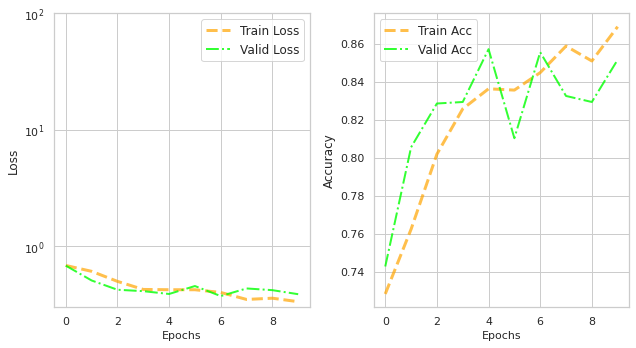

In [ ]:
### Plot train and validation curves
loss = resnet_train.history['loss']
v_loss = resnet_train.history['val_loss']

acc = resnet_train.history['acc']
v_acc = resnet_train.history['val_acc']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/', dpi=250)
plt.show()